# Dog breed classifier using CNN

## Project Overview

Image classification is an important task nowadays,  plays an important role for various applications from the automobile industry,  medical analysis, security, automated perception in robots, among others use cases.
    
But  categorizing and assigning labels to image is not a simple task for computers, with the advance in Artificial Intelligence, machine learning and image datasets available to train different type of neural neural networks, now is possible to achive acceptable results in image classification.  
   
As part of the final capstone Udacity Data science nanodegree, in this project different kind of computing vision algorithms will be used to classify human and dog images and try to predict the dog breed,  different datasets with images containing dog breeds and human faces are used to train, validate  and test different Convolutional Neural Networks models using supervised learning with the keras framework.
    
As a final product a web app is deployed putting together a series of models to perform different tasks.

## Problem statement

The problem  to be solved is image classification, we need to classify an image in three categories: dogs, humans  and others, If a dog is detected in the image, an estimate of the dog's breed must be provided. If a human is detected also an estimate of the dog breed that is most resembling, if neither is detected in the image, an output message that indicates an error must be shown.  

The project is divided in different steps:
    
    - Step 0: Import Datasets, analyze and process
    - Step 1: Detect Humans using the OpenCV framework
    - Step 2: Detect Dogs using the Resnet50 pretrainned CNN
    - Step 3: Create different CNN models to Classify Dog Breeds 
            - A model from Scratch
            - With transfer learning using VGG16 model
            - With transfer learning using Inception V3 model
    - Step 4: Evaluate models results
    - Step 5: Write and test the algorithm to classify predict the dogs breeds using the best models
    - Step 6: Write a web app
    
The expected project results is a web app with at least 60% accuracy, this app will accept any user-supplied image as input and provide a text message as output with the results. 

## Metrics

Based on the characteristics of the problem which is classification, diffrent metrics can be used: accuracy, precision, recall, f1 score, etc, to measure the performance of the  models.
    
    In classification problem we have different results:
    
- TP: True Positives
- TN: True Negatives
- FP: False Positives
- FN: False Negatives


Due to the datastet characteristics I will use **accuracy** which is one of the most common evaluation metrics, accuracy is very useful when the target class is balanced, that is the total number of correct predictions  (True Positives) divided by the total number of predictions made for a dataset.

![Accuracy](https://github.com/rafaelmata357/Data-Science-Udacity/blob/master/dog%20breed%20classifier/test_images/accuracy.png)

## $Accuracy = \frac{TP}{TP + TN + FP + FN}$

The CNN must attain at least **60%** accuracy on the test set.

## Analysis

### The datasets

#### Data exploration

There are two datasets available to solve this problem

- A dataset with 8351 dog images and 133 breeds
- A dataset with 13233 human face images


All the images are in jpg format




Due to the nature of the dataset there is not Nan values

These are some statistics about the datasets

![Dataset stats](https://github.com/rafaelmata357/Data-Science-Udacity/blob/master/dog%20breed%20classifier/test_images/dataset_characteristics.png)


In [41]:
sizes1 = [8351,'138K','4K','738K']
sizes2 = [13233,'14K','7K','26K']

In [42]:
df2 = pd.DataFrame({'Dogs Images':sizes1, 'Human Images':sizes2},index=['Files','Avg Size','Min Size','Max Size'])

In [43]:
df2

,Dogs Images,Human Images
Files,8351,13233
Avg Size,138K,14K
Min Size,4K,7K
Max Size,738K,26K


### Data visualization

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('dogs.csv')

![Image file sample distribution](https://github.com/rafaelmata357/Data-Science-Udacity/blob/master/dog%20breed%20classifier/test_images/sample_distribution.png)

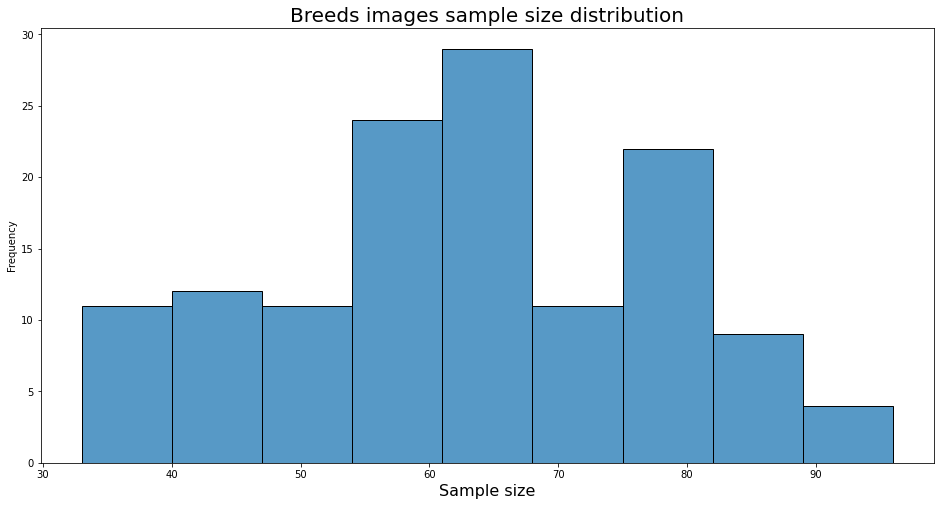

In [45]:
plt.figure(figsize=(16,8))
sns.histplot(df.qty)
plt.title('Breeds images sample size distribution', fontsize=20)
plt.xlabel('Sample size',fontsize=16)
plt.ylabel('Frequency');

The average breeds sample size is between 60 to 70 images per dog, there is top samples above 90 and lower samples below 40, but the minimum 33.

In [8]:
df['Breed'] = df.Breeds.str.split('.',expand=True)[1]

![Top breeds](https://github.com/rafaelmata357/Data-Science-Udacity/blob/master/dog%20breed%20classifier/test_images/Top%20breed%20chart.png)

In [10]:
df[['Breed','qty']].sort_values(by=['qty'],ascending=True).head(10)

,Breed,qty
107,Norwegian_buhund,33
131,Xoloitzcuintli,33
120,Plott,35
101,Manchester_terrier,36
130,Wirehaired_pointing_griffon,37
125,Saint_bernard,37
132,Yorkshire_terrier,38
127,Smooth_fox_terrier,38
115,Parson_russell_terrier,38
118,Petit_basset_griffon_vendeen,39


In [ ]:
![Lower breed samples](https://github.com/rafaelmata357/Data-Science-Udacity/blob/master/dog%20breed%20classifier/test_images/Low%20breed%20chart.png)

In [11]:
df[['Breed','qty']].sort_values(by=['qty'],ascending=False).head(10)

,Breed,qty
4,Alaskan_malamute,96
28,Border_collie,93
14,Basset_hound,92
56,Dalmatian,89
38,Bull_terrier,87
40,Bullmastiff,86
13,Basenji,86
45,Cavalier_king_charles_spaniel,84
10,Australian_cattle_dog,83
11,Australian_shepherd,83


----

In [23]:
file_size_img = np.load('file_size2.npy')

In [32]:
img_size = file_size_img[file_size_img < 400000]

In [35]:
img_size_bigger = file_size_img[file_size_img > 400000]

In [36]:
len(img_size_bigger)

348

In [44]:
348/8351*100

4.167165608909112

In [ ]:
![File size distribution](https://github.com/rafaelmata357/Data-Science-Udacity/blob/master/dog%20breed%20classifier/test_images/File_size_distribution.png)

In [17]:
file_size_human_img = np.load('file_size_human.npy')

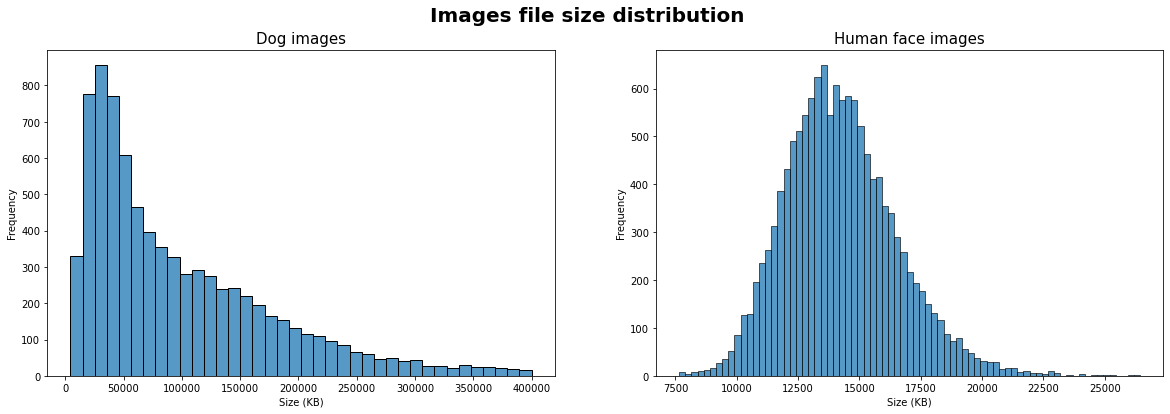

In [46]:
fig, ax = plt.subplots(nrows=1, ncols= 2,figsize=[20, 6])
fig.suptitle('Images file size distribution',fontsize=20, fontweight='bold')
ax[0].set_title('Dog images',fontsize=15)
ax[1].set_title('Human face images',fontsize=15);
sns.histplot(img_size,ax=ax[0])
#ax[0].grid(True)
sns.histplot(file_size_human_img ,ax=ax[1])
#ax[1].grid(True)
ax[0].set_xlabel('Size (KB)')
ax[1].set_xlabel('Size (KB)')
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency');

The dog images sizes have a right skew distribution with 4% of the files bigger than 400K Bytes, the human files have a normal distribution 

## Methodology

### Data Preprocessing

The images dataset are loaded through the use of the load_files function from the scikit-learn library and different and different variables for the models are generated

- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

```
def load_dataset(path):
    """ Function to load the images and generate different variables
        
        Params:
        path : str, path to the images
        
        Returns:
        dog_files, dog_targes : numpy array with the files names and the encoded targets
    """
    
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets
```

The dog dataset is splitted in three groups to train, validate and test the different models

The human dataset is loaded using the  glob function
```
human_files = np.array(glob("../../../data/lfw/*/*"))
```


For the OpenCV face detector, it is standard procedure to convert the images to grayscale. The detectMultiScale function executes the classifier stored in face_cascade and takes the grayscale image as a parameter.

```
# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
````


**For the keras CNN models these are the pre-processing steps:**

- Convert the input  to a 4D tensor, with shape (nb_samples,rows,columns,channels),
 
     - nb_samples corresponds to the total number of images (or samples) 
     - rows, columns, and channels correspond to the number of rows, columns, and  channels for each image.

- The path_to_tensor function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN. 

- The function first loads the image and resizes it to a square image that is  224×224  pixels.

- Next, the image is converted to an array, which is then resized to a 4D tensor. 

- In this case, since we are working with color images, each image has three channels, the returned tensor will always have shape (1,224,224,3).
 
- nb_samples is the number of 3D tensors (where each 3D tensor corresponds to a different image) in the dog images  dataset!



```
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):

    """ Function that takes a numpy array of string-valued image paths as input and returns a 4D tensor
    
        Params:
        img_path: string, path to the image
        
        Returns
        4D tensor with shape 1, 224, 224, 3)
        
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)
```


Moreover getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing. First, the RGB image is converted to BGR by reordering the channels and All pre-trained models have the additional normalization step that the mean pixel, This is implemented in the imported function **preprocess_input**

```
img = preprocess_input(path_to_tensor(img_path))

```

In addition for the CNN We rescale the images by dividing every pixel in every image by 255.

```
# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255
````

---

# Implementation


This the general flowchart for the program to be implemented, following will be explained the impletation of the different algorithms and models

![General Algorithm](https://github.com/rafaelmata357/Data-Science-Udacity/blob/master/dog%20breed%20classifier/test_images/Flow2.png)

**Three computer methods will be used to solve this problem:**
    
    - OpenCV framework to recognize a human face
    - A pre-trained ResNet-50 model to detect dogs
    - CNN with transfer learning to classify dog breeds

### **Classifying human faces using OpenCV framework**

OpenCV's implementation of Haar feature-based cascade classifiers is used to detect human faces in images. OpenCV provides many pre-trained face detectors.

```
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

```

```
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    ''' Function to detect is there is a human face in the image
    
        Params: img_path, string, path to the image
        
        Returns:
        A boolena variable indicating if a face is detected
        
    '''
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
        
    return len(faces) > 0

```


The algorithm is tested with the two datasets (human faces images and dog images) and 100 random images, these are the results:

     - Peformace of faces detected in the human files: 100.00%
     - Peformace of faces detected in the dog files: 11.00%

In [ ]:
### Detecting dogs using

### Refinement

---

## Results
---

### Model Evaluation and Validation
---


### Justification
---

## Conclusion

### Reflection
---

### Improvement
---